# WNS Analytics Wizard - 2018 Competition - Predicting Recommendations for Promotions

* Competition Site
* Description
* Evaluation
* Data Set
* Setup Imports and Variables
* Explore the Data
* Feature: Previous Year Ratings
* Feature: Gender
* Feature: no_of_trainings
* Feature: KPIs_met >80%
* Feature: awards_won?
* Feature: avg_training_score
* Feature: age
* Final Data Preparation for Machine Learning
* Data Wrangling Summary
* Random Forest: Training
* Random Forest: Predicting
* Random Forest: Prepare for Submission
* Support Vector Machine: Training
* Support Vector Machine: Predicting

## Competition Site

Description, Evaluation, and Data Set taken from the [competition site](https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018/).

## Description

<b>Problem Statement</b>

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.



They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

## Evaluation

<b>EVALUATION METRIC</b>

The evaluation metric for this competition is F1 Score.

## Data Set

| File Name        | Available Formats |
|------------------|-------------------|
| train            | .csv (3,672 kb)   |
| test             | .csv (1,529 kb)   |


<b>Data::</b>

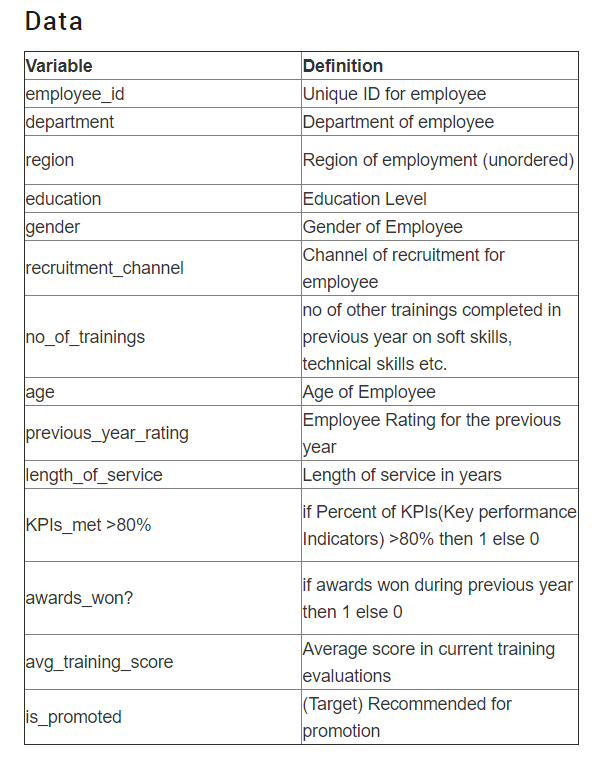

In [1]:
from IPython.core.display import Image 
Image(filename='data/dataset.png', width=800)

## Setup Imports and Variables

In [2]:
import pandas as pd
import numpy as np
import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

## Explore the Data

Read the data:

In [3]:
df_train = pd.read_csv('data/train.csv')
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df_train.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


View the data types of each column:

In [5]:
df_train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

Type 'object' is a string for pandas, which poses problems with machine learning algorithms.  If we want to use these as features, we'll need to convert these to number representations.

Get some basic information on the DataFrame:

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


<b>education</b>, and <b>previous_year_rating</b> have missing values.  education has too many missing values, whereas we might be able to infer values for previous_year_rating.

Generate various descriptive statistics on the DataFrame:

In [7]:
df_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Now that we have a general idea of the data set contents, we can dive deeper into each column. We'll be doing exploratory data analysis and cleaning data to setup 'features' we'll be using in our machine learning algorithms.

Plot a few features to get a better idea of each:

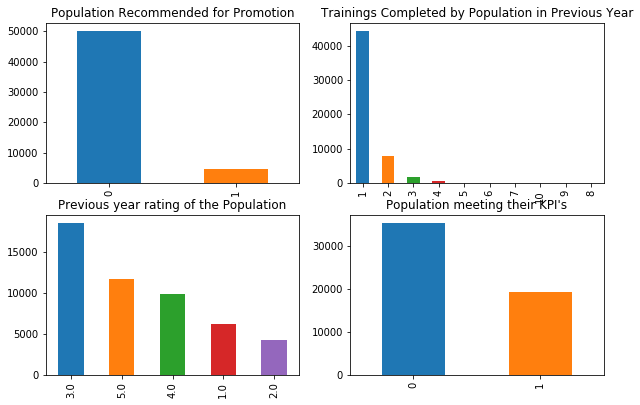

In [8]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot Recommended for Promotion and Not Recommended for Promotion - counts
plt.subplot2grid(fig_dims, (0, 0))
df_train['is_promoted'].value_counts().plot(kind='bar', 
                                         title='Population Recommended for Promotion')



# Plot no_of_trainings completed - counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['no_of_trainings'].value_counts().plot(kind='bar', 
                                       title='Trainings Completed by Population in Previous Year')
# Plot previous year rating - counts
plt.subplot2grid(fig_dims, (1, 0))
df_train['previous_year_rating'].value_counts().plot(kind='bar', 
                                       title='Previous year rating of the Population')

# Plot %KPI's met - counts
plt.subplot2grid(fig_dims, (1, 1))
df_train['KPIs_met >80%'].value_counts().plot(kind='bar', 
                                       title="Population meeting their KPI's")



Few basic insights:
    - Out of the total population less than 10000 are recommended for promotion
    - Very Few have gone beyond and completed more than 4 trainings in the previous year
    - Population with 3 rating is the highest (as expected), howeverthere are quite a lot of 4 and 5 raters as well
    - Count of employees meeting their KPI's is less than 20000

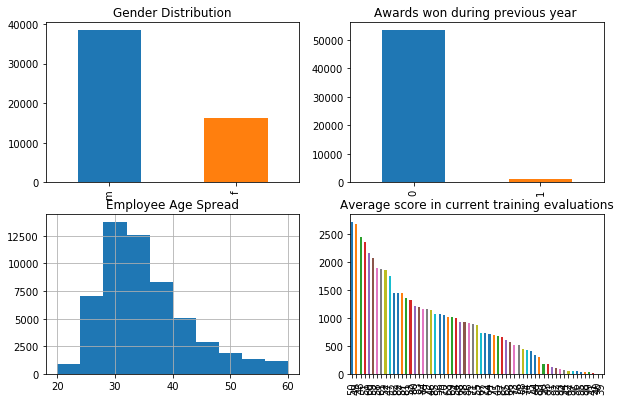

In [9]:
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot Gender - counts
plt.subplot2grid(fig_dims, (0, 0))
df_train['gender'].value_counts().plot(kind='bar', 
                                    title='Gender Distribution')

# Plot Awards Won - counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['awards_won?'].value_counts().plot(kind='bar', 
                                    title='Awards won during previous year ')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (1, 0))
df_train['age'].hist()
plt.title('Employee Age Spread')

# Plot Average Training Score - counts
plt.subplot2grid(fig_dims, (1, 1))
df_train['avg_training_score'].value_counts().plot(kind='bar', 
                                       title='Average score in current training evaluations')

Some additional basic insights:
    - Male population is higher than females
    - Rare cases of employees winning awards during previous years
    - Age spread is from 20-60
    - Last graph doesn't give us much statistics. Only that the average score is in decreasing trend

Next we'll explore various features to view their impact on Promotion.

## Feature: Previous Year Ratings

The previous_year_rating column might be an important feature but it is missing few data points which might pose a problem for machine learning algorithms:

In [10]:
df_train[df_train['previous_year_rating'].isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
62,9150,Analytics,region_22,Bachelor's,f,other,1,28,NaN,1,1,0,80,0
66,77981,Finance,region_22,Bachelor's,m,other,1,27,NaN,1,1,1,58,1
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,NaN,1,0,0,61,1
84,44575,Legal,region_7,Bachelor's,m,other,1,29,NaN,1,0,0,65,1
89,9589,Sales & Marketing,region_31,Bachelor's,f,other,1,31,NaN,1,0,0,51,0


Prepare to map previous_year_rating from a string to a number representation:

In [11]:
# Get the unique values of previous_year_rating
pyrs = sorted(df_train['previous_year_rating'].unique())

pyrs_mapping = dict(zip(pyrs,range(0, len(pyrs) + 1)))
pyrs_mapping

{1.0: 0, 2.0: 1, 3.0: 2, 4.0: 3, 5.0: 4, nan: 5}

Transform previous_year_rating from a string to a number representation to prepare it for machine learning algorithms:

In [12]:
df_train['pyr_val'] = df_train['previous_year_rating'] \
                               .map(pyrs_mapping) #\
                           #    .astype(int)
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,pyr_val
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,4.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,4.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,2.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,2.0


Plot the histogram for pyr_val:

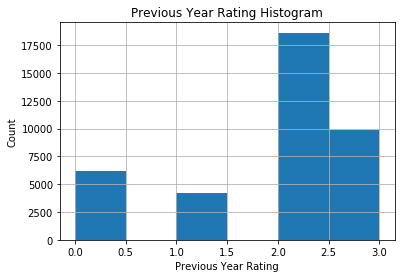

In [13]:
df_train['pyr_val'].hist(bins=len(pyrs), range=(0, 3))
plt.title('Previous Year Rating Histogram')
plt.xlabel('Previous Year Rating')
plt.ylabel('Count')
plt.show()

Since the vast majority of people's previous rating is 2 to 3, we assign the missing values in previous year rating to 3:

In [14]:
  
df_train['pyr_val'].fillna(3, inplace=True)

In [15]:
df_train.apply(lambda x: sum(x.isnull()))

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
pyr_val                    0
dtype: int64

No more nans in pyr_val. We will be using this column in our ML algorithm and dropping previou_year_rating column, so doesn't matter if there are Nulls in that column

From our exploratory data analysis in the previous section, we see there are five previous year ratings: 1,2,3,4 and 5. We'll determine which proportion of people got promoted based on their previous year ratings.

Generate a cross tab of previous_year_rating and is_promoted:

In [16]:
pyr_xt = pd.crosstab(df_train['pyr_val'], df_train['is_promoted'])
pyr_xt

is_promoted,0,1
pyr_val,,
0.0,6135,88
1.0,4044,181
2.0,17263,1355
3.0,12878,1123
4.0,9820,1921


Plot the cross tab:

Text(0,0.5,'Promotion Rate')

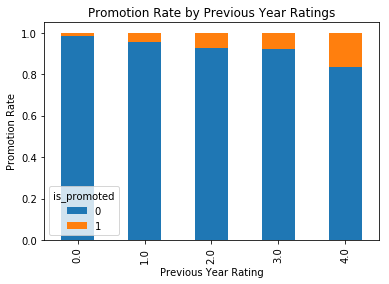

In [17]:
# Normalize the cross tab to sum to 1:
pyr_xt_pct = pyr_xt.div(pyr_xt.sum(1).astype(float), axis=0)

pyr_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Promotion Rate by Previous Year Ratings')
plt.xlabel('Previous Year Rating')
plt.ylabel('Promotion Rate')

We see very low impact of previous year rating on promotions as even the 4 & 5 raters seem to have got promoted

## Feature: Gender

Gender might have also played a role in determining the promotion rate. We'll need to map Gender from a string to a number to prepare it for machine learning algorithms.


Generate a mapping of Gender from a string to a number representation:

In [18]:
sexes = sorted(df_train['gender'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'f': 0, 'm': 1}

Transform Sex from a string to a number representation:

In [19]:
df_train['gender_val'] = df_train['gender'].map(genders_mapping).astype(int)
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,pyr_val,gender_val
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,4.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,4.0,1
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,2.0,1
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0.0,1
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,2.0,1


Plot a normalized cross tab for gender_val and is_promoted:

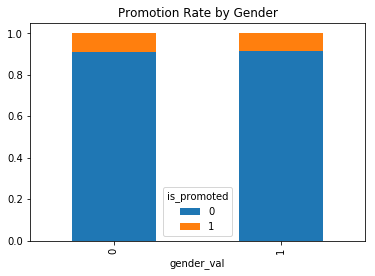

In [20]:
sex_val_xt = pd.crosstab(df_train['gender_val'], df_train['is_promoted'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Promotion Rate by Gender')

There seems to be little to no impact of Gender on Promotions

Next we'll determine whether we can gain any insights on Promotion rate by looking at both Gender and Previous Year Ratings.

Count males and females for each previous year ratings:

In [21]:
# Get the unique values of Pclass:
prev_yr_ratings = sorted(df_train['pyr_val'].unique())

for pyr in prev_yr_ratings:
    print('M: ', pyr, len(df_train[(df_train['gender'] == 'm') & 
                             (df_train['pyr_val'] == pyr)]))
    print('F: ', pyr, len(df_train[(df_train['gender'] == 'f') & 
                             (df_train['pyr_val'] == pyr)]))

M:  0.0 4562
F:  0.0 1661
M:  1.0 3004
F:  1.0 1221
M:  2.0 12985
F:  2.0 5633
M:  3.0 9806
F:  3.0 4195
M:  4.0 8139
F:  4.0 3602


Plot Promotion rate by Gender and Previous Year Ratings:

Text(0,0.5,'Promotion Rate')

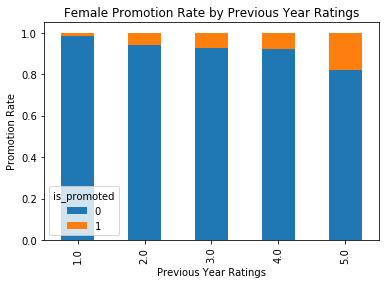

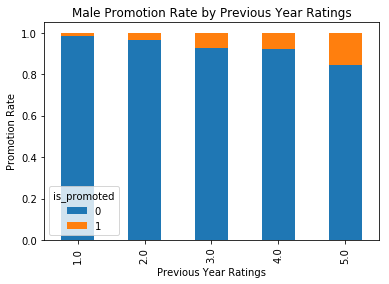

In [22]:
# Plot Promotion rate by Gender
females_df = df_train[df_train['gender'] == 'f']
females_xt = pd.crosstab(females_df['previous_year_rating'], df_train['is_promoted'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Female Promotion Rate by Previous Year Ratings')
plt.xlabel('Previous Year Ratings')
plt.ylabel('Promotion Rate')

# Plot Promotion rate by Previous Year Rating
males_df = df_train[df_train['gender'] == 'm']
males_xt = pd.crosstab(males_df['previous_year_rating'], df_train['is_promoted'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Male Promotion Rate by Previous Year Ratings')
plt.xlabel('Previous Year Ratings')
plt.ylabel('Promotion Rate')

There is a slight +ve increase in the number of female 5 raters getting promotion compared to men

## Feature: no_of_trainings

Generate a cross tab of no_of_trainings and is_promoted:

In [23]:
noftr_xt = pd.crosstab(df_train['no_of_trainings'], df_train['is_promoted'])
noftr_xt

is_promoted,0,1
no_of_trainings,,
1,40468,3910
2,7382,605
3,1654,122
4,442,26
5,125,3
6,42,2
7,12,0
8,5,0
9,5,0


Plot the cross tab:

Text(0,0.5,'Promotion Rate')

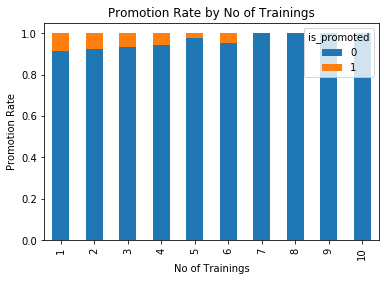

In [24]:
# Normalize the cross tab to sum to 1:
noftr_xt_pct = noftr_xt.div(noftr_xt.sum(1).astype(float), axis=0)

noftr_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Promotion Rate by No of Trainings')
plt.xlabel('No of Trainings')
plt.ylabel('Promotion Rate')

Lesser the no of trainings better are your chances to get promoted. That's weird!

## Feature: KPIs_met >80%

Generate a cross tab of KPIs_met >80% and is_promoted:

In [25]:
kpi_xt = pd.crosstab(df_train['KPIs_met >80%'], df_train['is_promoted'])
kpi_xt

is_promoted,0,1
KPIs_met >80%,,
0,34111,1406
1,16029,3262


Plot the cross tab:

Text(0,0.5,'Promotion Rate')

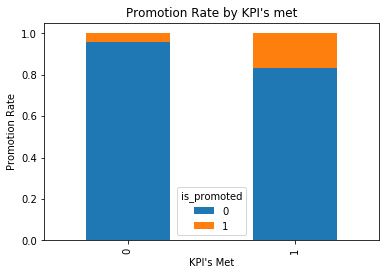

In [26]:
# Normalize the cross tab to sum to 1:
kpi_xt_pct = kpi_xt.div(kpi_xt.sum(1).astype(float), axis=0)

kpi_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title="Promotion Rate by KPI's met")
plt.xlabel("KPI's Met")
plt.ylabel('Promotion Rate')

More KPI's met, higher the chances of getting the promotion

## Feature: awards_won?

Generate a cross tab of awards_won? and is_promoted:

In [27]:
aw_xt = pd.crosstab(df_train['awards_won?'], df_train['is_promoted'])
aw_xt

is_promoted,0,1
awards_won?,,
0,49429,4109
1,711,559


Plot the cross tab:

Text(0,0.5,'Promotion Rate')

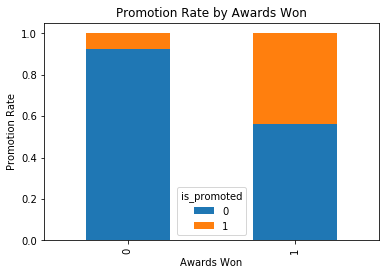

In [28]:
# Normalize the cross tab to sum to 1:
aw_xt_pct = aw_xt.div(aw_xt.sum(1).astype(float), axis=0)

aw_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title="Promotion Rate by Awards Won")
plt.xlabel("Awards Won")
plt.ylabel('Promotion Rate')

Absolutely! The more you won the awards, more are your chances of getting a promotion

## Feature: avg_training_score

Generate a cross tab of avg_training_score and is_promoted:

In [29]:
ats_xt = pd.crosstab(df_train['avg_training_score'], df_train['is_promoted'])
ats_xt.head()

is_promoted,0,1
avg_training_score,,
39,2,0
40,5,0
41,25,1
42,60,2
43,169,7


Plot the cross tab:

Text(0,0.5,'Promotion Rate')

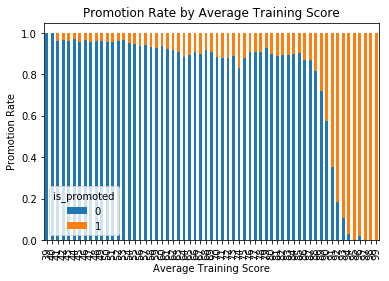

In [30]:
# Normalize the cross tab to sum to 1:
ats_xt_pct = ats_xt.div(ats_xt.sum(1).astype(float), axis=0)

ats_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title="Promotion Rate by Average Training Score")
plt.xlabel("Average Training Score")
plt.ylabel('Promotion Rate')

Yeah!!Higher the average training score, higher the chances of getting a promotion 

## Feature: age


Plot a normalized cross tab for age and is_promoted:

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'Age')

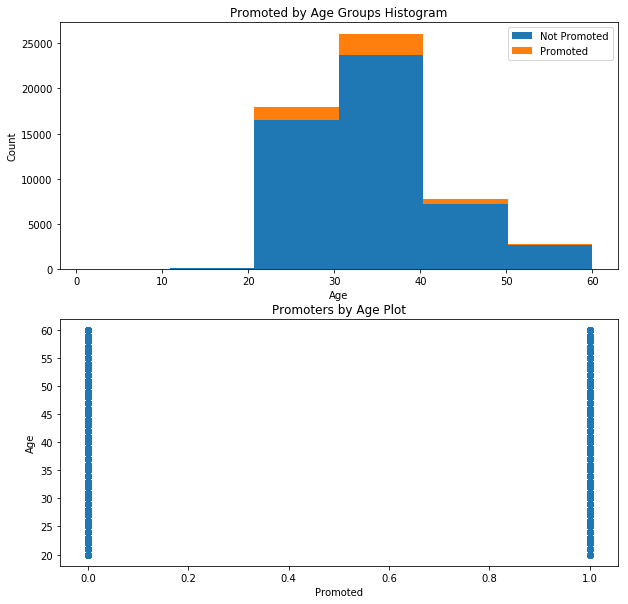

In [31]:
# Set up a grid of plots
fig, axes = plt.subplots(2, 1, figsize=fizsize_with_subplots)

# Histogram of Age segmented by Promoted
df1 = df_train[df_train['is_promoted'] == 0]['age']
df2 = df_train[df_train['is_promoted'] == 1]['age']
max_age = max(df_train['age'])
axes[0].hist([df1, df2], bins=int(max_age / bin_size), range=(1, max_age), stacked=True)
axes[0].legend(('Not Promoted', 'Promoted'), loc='best')
axes[0].set_title('Promoted by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Scatter plot Promoted and Age
axes[1].scatter(df_train['is_promoted'], df_train['age'])
axes[1].set_title('Promoters by Age Plot')
axes[1].set_xlabel('Promoted')
axes[1].set_ylabel('Age')

People from age group 20-40 largely favoured for promotion. No outliers!

We will dig further! Plot avg_training_score density by department:

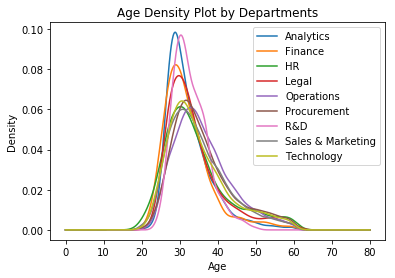

In [32]:
departments = sorted(df_train['department'].unique())

for dept in departments:
    df_train.age[df_train.department == dept].plot(kind='kde')
    plt.title('Age Density Plot by Departments')
    plt.xlabel('Age')
    plt.legend(('Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement','R&D', 'Sales & Marketing', 'Technology'), loc='best')

Cannot get much insights from the density plot as to what age group belonged to what departments 

Let's look at promotions by departments

In [33]:
dept_xt = pd.crosstab(df_train['department'], df_train['is_promoted'])
dept_xt

is_promoted,0,1
department,,
Analytics,4840,512
Finance,2330,206
HR,2282,136
Legal,986,53
Operations,10325,1023
Procurement,6450,688
R&D,930,69
Sales & Marketing,15627,1213
Technology,6370,768


Plot the cross tab:

Text(0,0.5,'Promotions')

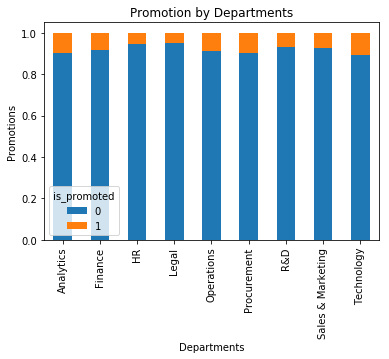

In [34]:
# Normalize the cross tab to sum to 1:
dept_xt_pct = dept_xt.div(dept_xt.sum(1).astype(float), axis=0)

dept_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title="Promotion by Departments")
plt.xlabel("Departments")
plt.ylabel('Promotions')

Analytics, Operations, Procurement & Technology had maximum promotions

In [35]:
# def plot_corr(df,size=10):
#     '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

#     Input:
#         df: pandas DataFrame
#         size: vertical and horizontal size of the plot'''

#     corr = df.corr()
#     fig, ax = plt.subplots(figsize=(size, size))
#     ax.matshow(corr)
#     plt.xticks(range(len(corr.columns)), corr.columns);
#     plt.yticks(range(len(corr.columns)), corr.columns);

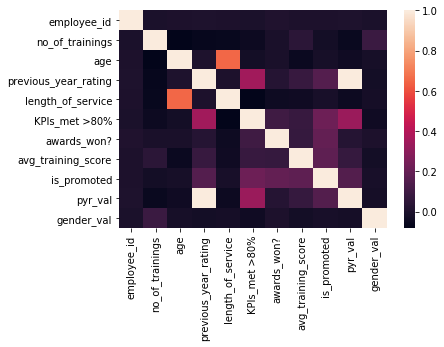

In [36]:
import seaborn as sns
corr = df_train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)



length of service and age are moderately correlated
KPI's met and previous year rating are mildly correlated
But none of the other independent variables correlate to our dependent variable is_promoted.



## Final Data Preparation for Machine Learning

Many machine learning algorithms do not work on strings and they usually require the data to be in an array, not a DataFrame.

Show only the columns of type 'object' (strings):

In [37]:
df_train.dtypes[df_train.dtypes.map(lambda x: x == 'object')]

department             object
region                 object
education              object
gender                 object
recruitment_channel    object
dtype: object

Drop the columns we won't use:

In [38]:
df_train = df_train.drop(['department', 'region', 'education', 'gender', 'recruitment_channel'], 
                         axis=1)

In [39]:
df_train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,pyr_val,gender_val
0,65438,1,35,5.0,8,1,0,49,0,4.0,0
1,65141,1,30,5.0,4,0,0,60,0,4.0,1
2,7513,1,34,3.0,7,0,0,50,0,2.0,1
3,2542,2,39,1.0,10,0,0,50,0,0.0,1
4,48945,1,45,3.0,2,0,0,73,0,2.0,1


Drop the following columns:
    <li> previous_year_rating column since we will be using pyr_val
    <li> The employee_id column since it won't be used as a feature.
    

In [40]:
df_train = df_train.drop(['previous_year_rating', 'employee_id'], axis=1)
df_train.dtypes

no_of_trainings         int64
age                     int64
length_of_service       int64
KPIs_met >80%           int64
awards_won?             int64
avg_training_score      int64
is_promoted             int64
pyr_val               float64
gender_val              int32
dtype: object

Convert the DataFrame to a numpy array:

In [41]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_train=scaler.fit_transform(df_train)


df_train = df_train[['is_promoted','no_of_trainings', 'age', 'length_of_service', 'KPIs_met >80%', 
                    'awards_won?', 'avg_training_score','gender_val', 'pyr_val']]
df_train=df_train.reset_index()
df_train=df_train.drop(['index'],axis=1)
#df_train.head()


#df_train

train_data = df_train.values
train_data


array([[ 0.,  1., 35., ..., 49.,  0.,  4.],
       [ 0.,  1., 30., ..., 60.,  1.,  4.],
       [ 0.,  1., 34., ..., 50.,  1.,  2.],
       ...,
       [ 0.,  1., 27., ..., 79.,  1.,  4.],
       [ 0.,  1., 29., ..., 45.,  1.,  0.],
       [ 0.,  1., 27., ..., 49.,  1.,  0.]])

## Data Wrangling Summary

Below is a summary of the data wrangling we performed on our training data set. We encapsulate this in a function since we'll need to do the same operations to our test set later.

In [42]:
def clean_data(df, drop_employee_id):
    
    # Get the unique values of Gender
    sexes = sorted(df['gender'].unique())
    
    # Generate a mapping of Genders from a string to a number representation    
    genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
    
    # Transform gender from a string to a number representation
    df['gender_val'] = df['gender'].map(genders_mapping).astype(int)
    
    #Fill in missing values of pyr
    df['previous_year_rating'].fillna(3, inplace=True)
 
    # Get the unique values of previous_year_rating
    pyr_vals = sorted(df['previous_year_rating'].unique())

    # Generate a mapping of previous_year_rating from a string to a number representation        
    pyr_vals_mapping = dict(zip(pyr_vals,range(0, len(pyr_vals) + 1)))
    
    #Transform pyr_val from a string to a number representation
    df['pyr_val'] = df['previous_year_rating'].map(pyr_vals_mapping) #\
                           #    .astype(int)

    # Drop the columns we won't use:
    df = df.drop(['department', 'region', 'education', 'gender', 'recruitment_channel'], axis=1)
    

    df = df.drop(['previous_year_rating'], axis=1)
    
    if drop_employee_id:
        df = df.drop(['employee_id'], axis=1)
    
    return df

## Random Forest: Training

Create the random forest object:

In [43]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

Fit the training data and create the decision trees:

In [44]:
# Training data features, skip the first column 'is_promoted'

train_features = train_data[:,1:]
print(train_features)

# 'is_promoted' column values
train_target = train_data[:,0]
print(train_target)

# Fit the model to our training data
clf = clf.fit(train_features, train_target)
score = clf.score(train_features, train_target)
"Mean accuracy of Random Forest: {0}".format(score)

[[ 1. 35.  8. ... 49.  0.  4.]
 [ 1. 30.  4. ... 60.  1.  4.]
 [ 1. 34.  7. ... 50.  1.  2.]
 ...
 [ 1. 27.  3. ... 79.  1.  4.]
 [ 1. 29.  2. ... 45.  1.  0.]
 [ 1. 27.  5. ... 49.  1.  0.]]
[0. 0. 0. ... 0. 0. 0.]


'Mean accuracy of Random Forest: 0.9826667639760619'

## Random Forest: Predicting

Read the test data:

In [45]:
df_test = pd.read_csv("data/test.csv")
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


Note the test data does not contain the column 'is_promoted', we'll use our trained model to predict these values.

In [46]:
# Data wrangle the test set and convert it to a numpy array
df_test = clean_data(df_test, drop_employee_id=False)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_test=scaler.fit_transform(df_test)
# df_test


test_data = df_test.values

In [47]:
df_test.head()

,employee_id,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,gender_val,pyr_val
0,8724,1,24,1,1,0,77,1,2
1,74430,1,31,5,0,0,51,0,2
2,72255,1,31,4,0,0,47,1,0
3,38562,3,31,9,0,0,65,0,1
4,64486,1,30,7,0,0,61,1,3


Take the decision trees and run it on the test data:

In [48]:
# Get the test data features, skipping the first column 'PassengerId'
test_x = test_data[:, 1:]

# Predict the Recommendation for Promotion values for the test data
test_y = clf.predict(test_x)

## Random Forest: Prepare for Submission

Create a DataFrame by combining the index from the test data with the output of predictions, then write the results to the output:

In [49]:
df_test['is_promoted'] = test_y
df_test[['employee_id', 'is_promoted']] \
    .to_csv('data/results-rf.csv', index=False)

## Evaluate Model Accuracy

Submitting will give you an accuracy score.  It would be helpful to get an idea of accuracy without submitting.

We'll split our training data, 80% will go to "train" and 20% will go to "test":

In [50]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split

# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(54808, 8) (54808,)
(43846, 8) (43846,)
(10962, 8) (10962,)


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Use the new training data to fit the model, predict, and get the accuracy score:

In [51]:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Accuracy = 0.91


View the Confusion Matrix:

|      | condition True | condition false|
|------|----------------|---------------|
|prediction true|True Positive|False positive|
|Prediction False|False Negative|True Negative|

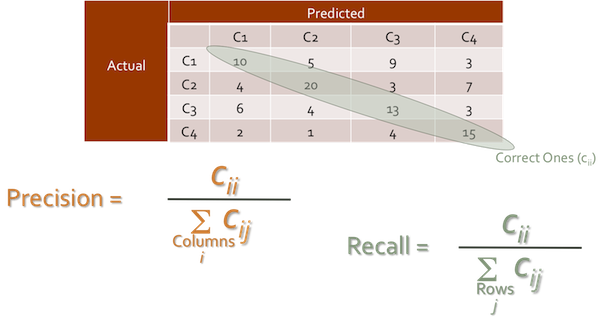

In [52]:
from IPython.core.display import Image 
Image(filename='data/confusion_matrix.png', width=800)

Get the model score and confusion matrix:

In [53]:
model_score = clf.score(test_x, test_y)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(test_y, predict_y)
print ("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Model Score 0.91 

Confusion Matrix  [[9804  237]
 [ 707  214]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 9804 | 237 |
Actual   |-----|-----|
       1 | 707 | 214 |
         |-----|-----|


Display the classification report:

$$Precision = \frac{TP}{TP + FP}$$ 

$$Recall = \frac{TP}{TP + FN}$$ 

$$F1 = \frac{2TP}{2TP + FP + FN}$$ 

In [54]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            predict_y, 
                            target_names=['Not Promoted', 'Promoted']))

              precision    recall  f1-score   support

Not Promoted       0.93      0.98      0.95     10041
    Promoted       0.47      0.23      0.31       921

 avg / total       0.89      0.91      0.90     10962

